In [2]:
from gensim.models import FastText
import os,sys
from urllib.parse import urlparse
from getImagesFunctions import *
from getDataFunctions import *
from gensim.models import Word2Vec
import gensim
import random
import langid
from langid.langid import LanguageIdentifier, model
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
import re
import pandas as pd
import json

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
with open("D:/react-data/protest/deniz/languages.json",'r') as fp:
    js = json.load(fp)

In [12]:
lan = [[res[0] for fn,res in v.items()] for k,v in js.items()]
lan = [item for sublist in lan for item in sublist]
Counter(lan).most_common(15)

[('tr', 2677),
 ('en', 806),
 ('an', 394),
 ('nl', 246),
 ('it', 90),
 ('es', 41),
 ('fr', 23),
 ('az', 22),
 ('ar', 22),
 ('ky', 14),
 ('no', 14),
 ('de', 13),
 ('qu', 12),
 ('fa', 12),
 ('el', 12)]

In [13]:
[[fn for fn,res in v.items() if res[0] == "nl"] for k,v in js.items()]

[['1/html/d7386b11-a56e-409f-9dbc-ecdc5496bfed.html',
  '1/html/59448a11-8bf8-4f20-977d-2f3503192860.html',
  '1/html/95b21bb3-c876-4181-8cab-04f87e886d61.html',
  '1/html/fd289bee-b598-4f01-815a-7ef708e399ad.html'],
 ['2/html/76586729-0d3c-4c37-8c50-612a3681f631.html',
  '2/html/d386cc46-a1a4-47f4-a54f-b72a9ef409e2.html',
  '2/html/5588882e-a1a4-4360-ac41-49ea15456b19.html',
  '2/html/642504e0-c03a-4f79-bc5f-8357693f3beb.html',
  '2/html/7439e8b8-12a3-40c2-918c-22c6f8750d16.html',
  '2/html/9ee863b6-2d58-4ead-b3dc-1ced48cc8a61.html',
  '2/html/fc122e9b-fa67-4ae2-9685-876ee537f005.html',
  '2/html/83ed8bd4-c281-42b0-b66a-4dc56671f04e.html',
  '2/html/00c05a71-06d4-4ab0-9455-72301e3d5d08.html',
  '2/html/2b606d9b-89a3-4e28-b378-8a7437a806de.html',
  '2/html/cc3fcbe8-6e02-4052-acc4-95592411cf4b.html',
  '2/html/0feda0ac-6878-4aa9-8cfd-8cb51dd220d6.html',
  '2/html/aa848a80-1d5b-48ae-a95d-b777931b61e1.html',
  '2/html/0dd0de2e-67ef-4939-af1a-7945cf352e95.html',
  '2/html/fd7d7dd0-df91-477

In [53]:
for lang in list(set([v[2] for k,v in url_d.items()])):
    sumlang = sum([float(v[3]) for k,v in url_d.items() if v[2] == lang])
    lenlang = len([v[3] for k,v in url_d.items() if v[2] == lang])
    prob = round(lenlang / sumlang) * 100
    print(lang, prob)

bs 100
nl 100
vo 200
lb 100
pl 100
se 200
fr 100
lt 100
pt 100
it 100
mg 100
sw 100
eu 100
nn 200
la 200
id 100
tl 100
hr 100
ms 200
vi 100
ca 100
sk 100
tr 100
sv 100
sl 100
af 100
an 100
da 100
is 100
br 100
rw 100
mt 200
ga 100
gl 100
de 100
en 100
sq 100
nb 200
oc 100
jv 100
zu 200
es 100
hu 100
et 200
fo 200
lv 100
ro 100
no 100
cy 100
eo 100
cs 200
fi 200


In [67]:
reslist = []

for year in list(set([v[0][0:4] for k,v in url_dn.items() if v[0][0:4] != "unsu"])):
    subset_year = {k:v for k,v in url_dn.items() if v[0][0:4] == year}
    
    for lang in list(set([v[2] for k,v in url_d.items()])):
        num_year_lang = len([v for k,v in subset_year.items() if v[2] == lang])
        reslist.append([year, lang, num_year_lang])
        

In [68]:
resdf = pd.DataFrame(reslist, columns = ['year','lang','count']).pivot(index='year',values='count',columns = 'lang').reset_index()

In [80]:
selcol = [c for c in list(resdf.columns[1:]) if resdf[c].sum() > 25] + ['year']
resdf = resdf[selcol]

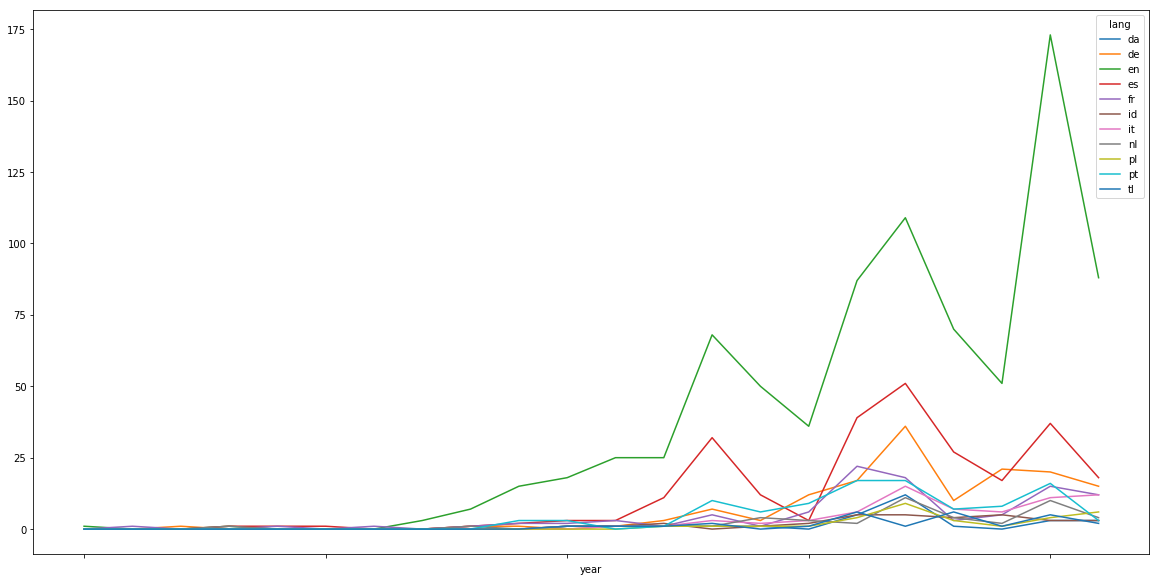

In [84]:
p = resdf.plot(x='year',y=list(resdf.columns)[:-1],figsize = (20,10))

In [82]:
resdf

lang,da,de,en,es,fr,id,it,nl,pl,pt,tl,year
0,0,0,1,0,0,0,0,0,0,0,0,1995
1,0,0,0,0,1,0,0,0,0,0,0,1998
2,0,1,0,0,0,0,0,0,0,0,0,1999
3,0,0,1,1,0,0,0,1,0,0,0,2000
4,0,0,0,1,1,0,0,0,0,0,0,2001
5,0,0,0,1,0,0,0,0,0,0,0,2004
6,0,0,0,0,1,0,0,0,0,0,0,2005
7,0,0,3,0,0,0,0,0,0,0,0,2006
8,0,1,7,1,1,0,0,1,0,0,0,2007
9,0,1,15,2,2,0,0,0,0,3,0,2008


In [3]:
df = pd.read_csv('D:/react-data/image_npg_1/txt/parsed_text.csv')

In [8]:
for i in range(len(df)):
    print(df['id'][0].split('\\')[2].split('_')[0])

70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353fe.html
70d5ba99-8e83-4780-a1b3-40427ad353

In [9]:
df['text'][0]

'[Telemetro es un canal de MEDCOM Panamá | Copyright © 2019., Todos los derechos reservados.\r\n]'

In [10]:
import ast

In [21]:
df['id'][0].split('\\')[2].split('_')[0]

,id,text
0,D:/react-data/image_npg_1\html\70d5ba99-8e83-4...,[Telemetro es un canal de MEDCOM Panamá | Copy...
1,D:/react-data/image_npg_1\html\34639c19-ba8c-4...,"[Fillette brûlée au napalm : 43 ans après, ell..."
2,D:/react-data/image_npg_1\html\950e894f-7d77-4...,"[Kjo faqe kontrollohet dhe menaxhohet, nga kom..."
3,D:/react-data/image_npg_1\html\01732bf5-1811-4...,"[Konspirationsteoretiker på besøg, i Danmark:,..."
4,D:/react-data/image_npg_1\html\8d96d0af-5b75-4...,[A WOMAN dubbed the ‘Napalm Girl' whose terrif...


In [25]:
[i.split('\\')[-1].split('_')[1] for i in df['id']]

['https://www.telemetro.com/tags/la-nina-de-napalm/',
 'https://www.nouvelobs.com/monde/20151026.OBS8323/fillette-brulee-au-napalm-43-ans-apres-elle-recoit-des-soins-au-laser.html',
 'https://ballkani.info/2019/10/vajza-e-napalmit-ndihej-e-turperuar-qe-u-fotografua-e-zhveshur-donte-te-kishte-vdekur/',
 'https://www.information.dk/emne/911-2001',
 'https://www.thescottishsun.co.uk/news/3867827/napalm-girl-in-harrowing-1972-vietnam-war-photo-receives-10000-peace-award-for-her-support-of-wounded-kids/',
 'https://www.businesstelegraph.co.uk/moonwalk-and-9-11-photographs-part-of-global-visual-memory/',
 'https://twitter.com/ajarabic/status/774759489400479744?lang=en',
 'https://www.mirror.co.uk/tv/tv-news/napalm-girl-whose-photo-ended-20716032',
 'https://starspost.com/napalm-girl-whose-photo-ended-a-war-on-how-she-learned-to-love-the-harrowing-image/',
 'https://www.inquirer.com/arts/girl-in-vietnam-picture-kim-phuc-hannibal-locumbe-20191205.html',
 'https://kknews.cc/zh-my/world/2mg8rx9.

In [26]:
identifier.classify("dit is een test")

('nl', 0.990988042819209)